In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
100% 1.98G/1.98G [00:29<00:00, 115MB/s]
100% 1.98G/1.98G [00:29<00:00, 72.4MB/s]


In [ ]:
!unzip fruit-and-vegetable-image-recognition.zip

In [ ]:
train_dir='/content/train'
test_dir='/content/test'
val_dir='/content/validation'

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from PIL import Image
import numpy as np

In [ ]:
BATCH_SIZE=64
EPOCHS=20

In [ ]:
train_transform=torchvision.transforms.Compose([
    torchvision.transforms.Resize((227,227)),
    torchvision.transforms.RandomCrop((227,227)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
])

test_transform=torchvision.transforms.Compose([
    torchvision.transforms.Resize((227,227)),
    torchvision.transforms.CenterCrop((227,227)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
])


In [ ]:
train_dataset=torchvision.datasets.ImageFolder(train_dir,transform=train_transform)
test_dataset=torchvision.datasets.ImageFolder(test_dir,transform=test_transform)
val_dataset=torchvision.datasets.ImageFolder(val_dir,transform=test_transform)

In [ ]:
train_loader=torch.utils.data.DataLoader(train_dataset,batch_size=BATCH_SIZE,shuffle=True)
test_loader=torch.utils.data.DataLoader(test_dataset,batch_size=BATCH_SIZE,shuffle=False)
val_loader=torch.utils.data.DataLoader(val_dataset,batch_size=BATCH_SIZE,shuffle=False)

In [ ]:
for image,label in train_loader:
  print(image.shape)
  print(label)
  break

In [ ]:
class Alexnet(torch.nn.Module):
  def __init__(self,num_classes):
    super().__init__()
    self.features=nn.Sequential(
    nn.Conv2d(3,96,kernel_size=11,stride=4,padding=2,bias=False),
    nn.ReLU(inplace=True),
    nn.MaxPool2d(kernel_size=3,stride=2,padding=0),
    nn.Conv2d(96,192,kernel_size=5 ,stride=1,padding=2,bias=False),
    nn.ReLU(inplace=True),
    nn.MaxPool2d(kernel_size=3,stride=2,padding=0),
    nn.Conv2d(192,384,kernel_size=3,stride=1,padding=1,bias=False),
    nn.ReLU(inplace=True),
    nn.Conv2d(384,256,kernel_size=3,stride=1,padding=1,bias=False),
    nn.ReLU(inplace=True),
    nn.Conv2d(256,256,kernel_size=3,stride=1,padding=1,bias=False),
    nn.ReLU(inplace=True),
    nn.MaxPool2d(kernel_size=3,stride=2,padding=0))

    self.classifier=nn.Sequential(
    nn.Dropout(p=0.5),
    nn.Linear(256 * 6 * 6, 4096),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5),
    nn.Linear(4096,4096),
    nn.ReLU(inplace=True),
    nn.Linear(4096,num_classes)
    )

  def forward(self,x):
    x=self.features(x)
    x=x.view(x.size(0),256*6*6)
    x=self.classifier(x)
    return x

In [ ]:



model.to(device)


In [ ]:

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=Alexnet(36).to(device)

optimizer=optim.Adam(model.parameters(),lr=0.001)

criterion=nn.CrossEntropyLoss()

def accuracy(outputs,labels):
  _,predicted= torch.max(outputs,1)
  correct= (predicted == labels).sum().item()
  total= labels.size(0)

  return correct/total

def compute_accuracy(model,data_loader):
  model.eval()
  correct=0
  total=0
  with torch.no_grad():
    for inputs,labels in data_loader:
      inputs, labels = inputs.to(device), labels.to(device)
      outputs=model(inputs)
      _,predicted= torch.max(outputs,1)
      total+= labels.size(0)
      correct += (predicted==labels).sum().item()
  return correct/total

def train (model,train_loader,optimizer,criterion):
  model.train()
  running_loss=0.0
  for inputs,labels in train_loader:
    inputs, labels = inputs.to(device), labels.to(device)
    optimizer.zero_grad()
    outputs=model(inputs)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item() * inputs.size(0)
  return running_loss/len(train_loader.dataset)

def validate (model,val_loader,criterion):
  model.eval()
  running_loss=0.0
  with torch.no_grad():
    for inputs,labels in val_loader:
      inputs, labels = inputs.to(device), labels.to(device)
      outputs=model(inputs)
      loss=criterion(outputs,labels)
      running_loss += loss.item() * inputs.size(0)
  return running_loss/len(val_loader.dataset)



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch1/20,Train loss 3.6203,Val loss 3.5058,Train accuracy0.0404,Val accuracy0.0399
Epoch2/20,Train loss 3.4061,Val loss 3.2648,Train accuracy0.0536,Val accuracy0.0541
Epoch3/20,Train loss 3.2209,Val loss 2.9367,Train accuracy0.1053,Val accuracy0.1368
Epoch4/20,Train loss 3.0107,Val loss 2.7641,Train accuracy0.1374,Val accuracy0.1624
Epoch5/20,Train loss 2.8352,Val loss 2.5581,Train accuracy0.1634,Val accuracy0.1966
Epoch6/20,Train loss 2.7494,Val loss 2.4124,Train accuracy0.2032,Val accuracy0.2764
Epoch7/20,Train loss 2.6003,Val loss 2.2193,Train accuracy0.2549,Val accuracy0.3390
Epoch8/20,Train loss 2.4574,Val loss 1.9895,Train accuracy0.3114,Val accuracy0.3903
Epoch9/20,Train loss 2.3291,Val loss 1.7336,Train accuracy0.3692,Val accuracy0.4530
Epoch10/20,Train loss 2.1876,Val loss 1.5152,Train accuracy0.4083,Val accuracy0.5442
Epoch11/20,Train loss 2.0301,Val loss 1.3594,Train accuracy0.4767,Val accuracy0.5812
Epoch12/20,Train loss 1.9134,Val loss 1.1975,Train accuracy0.5204,Val accu

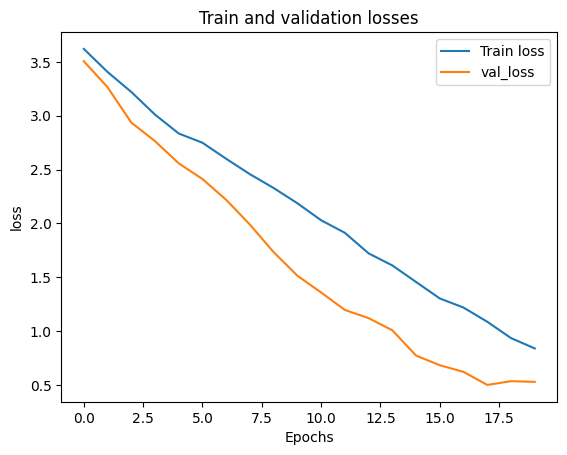

In [ ]:
train_losses=[]
val_losses=[]



for epoch in range(EPOCHS):
  train_loss=train(model,train_loader,optimizer,criterion)
  val_loss=validate(model,val_loader,criterion)
  train_accuarcy=compute_accuracy(model,train_loader)
  val_accuracy=compute_accuracy(model,val_loader)

  train_losses.append(train_loss)
  val_losses.append(val_loss)

  tqdm.write(f'Epoch{epoch+1}/{EPOCHS},'
             f'Train loss {train_loss:.4f},'
             f'Val loss {val_loss:.4f},'
             f'Train accuracy{train_accuarcy:.4f},'
             f'Val accuracy{val_accuracy:.4f}')


plt.plot(train_losses,label='Train loss')
plt.plot(val_losses,label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Train and validation losses')
plt.legend()
plt.show()

In [ ]:

def predict(model, test_loader):
    model.eval()
    predictions = []
    with torch.no_grad():
        for inputs, _ in test_loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            predictions.extend(predicted.cpu().numpy())
    return predictions


In [ ]:
test_predictions=predict(model,test_loader)
acc=accuracy_score(test_dataset.targets,test_predictions)
print(acc)

0.883008356545961


In [ ]:
class_label_map = train_dataset.class_to_idx

for class_name, label in class_label_map.items():
    print(f"Class: {class_name}, and its label: {label}")


Class: apple, and its label: 0
Class: banana, and its label: 1
Class: beetroot, and its label: 2
Class: bell pepper, and its label: 3
Class: cabbage, and its label: 4
Class: capsicum, and its label: 5
Class: carrot, and its label: 6
Class: cauliflower, and its label: 7
Class: chilli pepper, and its label: 8
Class: corn, and its label: 9
Class: cucumber, and its label: 10
Class: eggplant, and its label: 11
Class: garlic, and its label: 12
Class: ginger, and its label: 13
Class: grapes, and its label: 14
Class: jalepeno, and its label: 15
Class: kiwi, and its label: 16
Class: lemon, and its label: 17
Class: lettuce, and its label: 18
Class: mango, and its label: 19
Class: onion, and its label: 20
Class: orange, and its label: 21
Class: paprika, and its label: 22
Class: pear, and its label: 23
Class: peas, and its label: 24
Class: pineapple, and its label: 25
Class: pomegranate, and its label: 26
Class: potato, and its label: 27
Class: raddish, and its label: 28
Class: soy beans, and its 

In [ ]:
testing_dir='/content/test/beetroot/Image_6.jpg'

testing_photo=Image.open(testing_dir)

transfrom=torchvision.transforms.Compose([
    torchvision.transforms.Resize((227,227)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

input_tensor=transfrom(testing_photo).unsqueeze(0)

input_tensor=input_tensor.to(device)

model.eval()

with torch.no_grad():
  outputs=model(input_tensor)

_, predicted=torch.max(outputs,1)

predicted_class_name = list(class_label_map.keys())[list(class_label_map.values()).index(predicted.item())]

print(f"The predicted class label for the photo is: {predicted_class_name}")



The predicted class label for the photo is: beetroot
